# Math Modeling: Intro to Data Analysis




## Review of Pandas

Pandas is a Python library that helps organize and analyze data efficiently.  
You can use it to:
- Load, filter, and clean datasets  
- Calculate statistics quickly  
- Create visualizations to summarize trends  

Run the code below to import your libraries.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Set up display options for readability
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 2)

**Some useful functions:**  
`pd.query`: Allows you to filter rows of a DataFrame based on a boolean expression provided as a string. 
Example usage: df.query('column_name > value') gives you the rows that have column_name > value

`pd.nlargest`: Returns the first n rows with the largest values in columns, in descending order.
Example usage: df.nlargest(3, 'population') gives you the 3 rows with the largest population.

Note: This function cannot be used with all column types. For example, when specifying columns with object or category dtypes, TypeError is raised.

`pd.describe`: Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Example usage: df.describe() gives output   

        numeric
count      3.0
mean       2.0
std        1.0
min        1.0
25%        1.5
50%        2.0
75%        2.5
max        3.0

Note: to describe all columns of a dataframe regardless of their type set include='all'

Link to pandas documentation where you can find all sorts of methods: https://pandas.pydata.org/docs/reference/frame.html

## What is Data Analysis?

Data analysis helps you **make sense of raw information** to answer questions or make predictions.

**Pros:**
- Helps identify patterns that are not immediately apparent to the "naked eye"
- Supports evidence-based decisions  

**Cons:**
- Can be misleading if data is incomplete or inconsistent 
    - Common misconception: Just because two variables are shown to have a correlation, that does not necessarily mean one causes the other
        - Further testing would be needed to distinguish correlation from causation
- Requires clean and reliable input
    - Data sources should be known
    - Be mindful of missing values and have a strategy to handle them

If data analyis is not well thought out we can end up with ridiculous results like this:
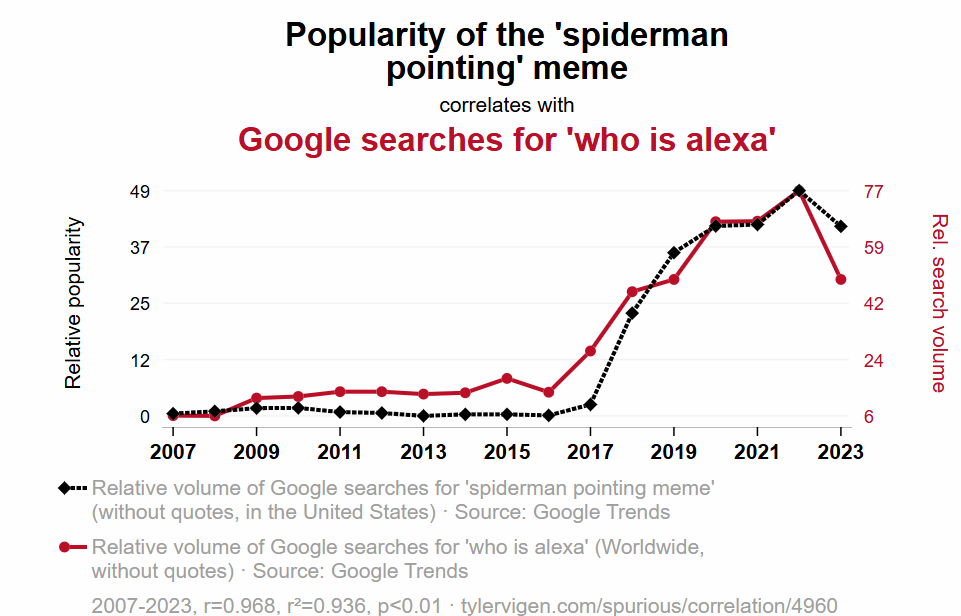


## Basic Method

Data analysis often follows this general method:

1. **Data collection**  
2. **Data cleaning**  
3. **Exploration**  
4. **Model building** (check that your inferences are correct)  
5. **Communicate findings**

You’ll practice each step below using a small dataset.


### Step 1: Data Collection

In [9]:
# Step 1: Load data
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Questions:**
1. How many rows and columns are in this dataset?
2. What does each column represent?


**Your Answer**

### Step 2: Data Cleaning

In [3]:
# Step 2: Clean data
data.info()        # Check for missing values
data.isna().sum()  # Count missing entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

 If you find any missing values, you could decide to fill them in whith some value that makes sense with the data or just drop any rows with missing values.


In [4]:
# Example:
# data = data.dropna()

### Step 3: Exploration

       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.06          3.76         1.20
std            0.83         0.44          1.77         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50


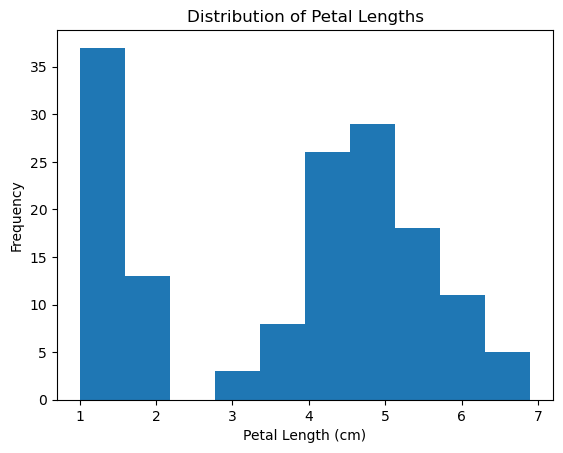

In [5]:
# Step 3: Explore
print(data.describe())

plt.hist(data["petal_length"], bins=10)
plt.title("Distribution of Petal Lengths")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()

**Questions:**
1. What does the histogram tell you about petal lengths?
2. Are there any visible patterns or clusters?


**Your Anser**

## Step 4: Model Building

In [6]:
# Step 4: Build a simple model (group and compare)
avg_lengths = data.groupby("species")["petal_length"].mean()
avg_lengths

species
setosa        1.46
versicolor    4.26
virginica     5.55
Name: petal_length, dtype: float64

**Interpretation:**  
Which species has the longest petals on average?
What conclusion might you draw from this?


**Your Answer**

### Step 5: Communicate Findings

Write a short summary of what you discovered.  
Your summary should:
- Include 1–2 sentences describing your data  
- Mention one interesting pattern or comparison  
- Suggest what further data might help improve the analysis  

**Your summary:**
```
Type your answer here...
```


## Important Notes

- Use **statistics**, **plots**, and **grouping** to explore your data and test your ideas.  
- Always question your conclusions — could something else explain the trend?  
- **Data analysis is iterative:** hypothesis → test → conclusion → new hypothesis → …  

### Understanding Significance Levels  
When you analyze data, sometimes you want to know whether your results are **real** or just due to random chance.  
This is where the **significance level** (often written as **α**, alpha) comes in.  

- Common values are **0.05** (5%) or **0.01** (1%).  
- If the probability (called the **p-value**) is *less than α*, your result is considered **statistically significant** — meaning it’s unlikely to have happened by chance.


In [7]:
from scipy import stats

# Example: compare petal lengths between two species
setosa = data[data["species"] == "setosa"]["petal_length"]
versicolor = data[data["species"] == "versicolor"]["petal_length"]

t_stat, p_value = stats.ttest_ind(setosa, versicolor)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Significant difference between species!")
else:
    print("❌ No significant difference found.")

p-value: 5.404910513441677e-62
✅ Significant difference between species!


**Questions:**
1. What does the p-value tell you about the two groups?
2. How would increasing or decreasing α (the significance level) change your confidence in the result? Lower α = Higher confidence


**Your Answer**

## Now try it yourself

Try downloading a free dataset from [Kaggle](https://www.kaggle.com/datasets) or another source, and repeat the **five-step method** on your own.  
You can use techniques like:
- `groupby()`
- `.corr()`
- scatter plots or bar charts  

Include **1–2 plots** that support your conclusion.


## Conclusions

- “Black box” analysis is not useful — you must be able to explain your reasoning. 
    - Intuitions are useful, but they won't convince stakeholders. 
- Only use techniques you understand.  
- Be cautious: **past data doesn’t always predict the future.**  
- This sets the stage for **machine learning** and predictive modeling!
